In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

# Dispersion relations

In [7]:
# ... dispersion relations for magnetosonic waves and shear Alfvén waves (no energetic ions)
def omegaM(k, pol):
    
    B0x   = 1.
    B0y   = 1.
    B0z   = 0.
    p0    = 1.
    rho0  = 1.
    
    gamma = 5/3                                        # ... adiabatic exponent
    cS    = np.sqrt(gamma*p0/rho0)                     # ... speed of sound
    vA    = np.sqrt((B0x**2 + B0y**2 + B0z**2)/rho0)   # ... Alfvén velocity
    
    delta = (4*B0x**2*cS**2*vA**2)/((cS**2 + vA**2)**2*(B0x**2 + B0y**2 + B0z**2))
    
    return np.sqrt(1/2*k**2*(cS**2 + vA**2)*(1 + pol*np.sqrt(1 - delta)))

def omegaS(k):
    
    B0x   = 1.
    B0y   = 1.
    B0z   = 0.
    p0    = 1.
    rho0  = 1.
    
    gamma = 5/3                                        # ... adiabatic exponent
    cS    = np.sqrt(gamma*p0/rho0)                     # ... speed of sound
    vA    = np.sqrt((B0x**2 + B0y**2 + B0z**2)/rho0)   # ... Alfvén velocity
    
    
    return vA*k*B0x/np.sqrt(B0x**2 + B0y**2 + B0z**2)
# ...

In [8]:
# ... dispersion relation for shear Alfvén waves + full-orbit energetic ions
def solveDispersionFullOrbit(k, pol, wch, vA, vth, v0, nuh, Ah, Zh, AMHD, initial_guess, tol, max_it=100):
    
    
    def Z(xi):
        return np.sqrt(np.pi)*np.exp(-xi**2)*(1j - sp.erfi(xi))

    def Zprime(xi):
        return -2*(1 + xi*Z(xi))
    
    
    def D(k, w, pol):
        xi = (w - k*v0 + pol*wch)/(k*vth)
        
        return 1 - vA**2*k**2/w**2 + pol*Zh*nuh*wch/(AMHD*w) + nuh*wch**2*Zh**2/(Ah*AMHD*w**2)*(w - k*v0)/(k*vth)*Z(xi)
    
    def Dprime(k, w, pol):
        xi  = (w - k*v0 + pol*wch)/(k*vth)
        xip = 1/(k*vth)
        
        return 2*vA**2*k**2/w**3 - pol*Zh*nuh*wch/(AMHD*w**2) - 2*nuh*wch**2*Zh**2/(Ah*AMHD*w**3)*(w - k*v0)/(k*vth)*Z(xi) + nuh*wch**2*Zh**2/(Ah*AMHD*w**2)*1/(k*vth)*Z(xi) + nuh*wch**2*Zh**2/(Ah*AMHD*w**2)*(w - k*v0)/(k*vth)*Zprime(xi)*xip
    
    w = initial_guess
    counter = 0
    
    while True:
        wnew = w - D(k, w, pol)/Dprime(k, w, pol)
        
        if np.abs(wnew - w) < tol or counter == max_it:
            w = wnew
            break

        w = wnew
        counter += 1

    return w, counter
# ...


k          = 0.75                        # wavenumber
g_sqrt     = 2*np.pi/k                   # Jacobi determinant
nuh        = 0.05                        # ration hot/cold ion number densities
rhoeq_phys = 1.                          # bulk mass density on physical domain
nh0_phys   = rhoeq_phys*nuh              # hot ion number density on physical domain
nh0        = nh0_phys*g_sqrt             # hot ion number density on logical domain 
vth        = 1.                          # thermal velocity of hot ions
v0         = 2.5                         # mean velocity of hot ions

Ah         = 1.
Zh         = 1.
AMHD       = 1.

Eh_eq = nh0/2*(v0**2 + 3*vth**2/2)

w, counter = solveDispersionFullOrbit(k, +1, +1, 1., vth, v0, nuh, Ah, Zh, AMHD, 1. + 0j, 1e-10, max_it=100)

wr = np.real(w)
wi = np.imag(w)

In [9]:
k          = 0.75                        # wavenumber
g_sqrt     = 2*np.pi/k                   # Jacobi determinant
nuh        = 0.05                        # ration hot/cold ion number densities
rhoeq_phys = 1.                          # bulk mass density on physical domain
nh0_phys   = rhoeq_phys*nuh              # hot ion number density on physical domain
nh0        = nh0_phys*g_sqrt             # hot ion number density on logical domain 
vth        = 1.                          # thermal velocity of hot ions
v0         = 2.5                         # mean velocity of hot ions

Ah         = 1.
Zh         = 1.
AMHD       = 1.

Eh_eq = nh0/2*(v0**2 + 3*vth**2/2)

w, counter = solveDispersionFullOrbit(k, +1, +1, 1., vth, v0, nuh, Ah, Zh, AMHD, 1. + 0j, 1e-10, max_it=100)

wr = np.real(w)
wi = np.imag(w)

In [10]:
wi

0.07443331592562585

# Results
## Data

In [11]:
# delta-f
# x-direction: pseudo-random
str_01 = 'results/STRUPHY_Nel=20_p=3_L=2pidk_dt=0.04_Np=1e5_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-4\
_CV=on_x.txt'
# x-direction: sobol
str_02 = 'results/STRUPHY_Nel=20_p=3_L=2pidk_dt=0.04_Np=1e5_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-4\
_CV=on_x_sobol_ref.txt'
# y-direction: pseudo-random
str_03 = 'results/STRUPHY_Nel=20_p=3_L=2pidk_dt=0.04_Np=1e5_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-4\
_CV=on_y.txt'
# z-direction: pseudo-random
str_04 = 'results/STRUPHY_Nel=20_p=3_L=2pidk_dt=0.04_Np=1e5_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-4\
_CV=on_z.txt'
# xy-direction: pseudo-random
str_05 = 'results/STRUPHY_Nel=20_p=3_L=2pidk_dt=0.04_Np=4e5_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-4\
_CV=on_xy.txt'

# full-f
# z-direction: pseudo-random
str_06 = 'results/STRUPHY_Nel=20_p=3_L=2pidk_dt=0.04_Np=5e6_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-5\
_CV=off_z.txt'
# z-direction: sobol
str_07 = 'results/STRUPHY_Nel=20_p=3_L=2pidk_dt=0.04_Np=5e6_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-5\
_CV=off_z_sobol.txt'
# x-direction: pseudo-random, many
str_08 = 'results/STRUPHY_Nel=16_p=3_L=2pidk_dt=0.08_Np=1e7_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-6\
_CV=off_x.txt'
# x-direction: sobol antithetic1000, many
str_09 = 'results/STRUPHY_Nel=16_p=3_L=2pidk_dt=0.08_Np=1e7_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-6\
_CV=off_x_sobola1000.txt'
# x-direction: sobol antithetic, many
str_10 = 'results/STRUPHY_Nel=16_p=3_L=2pidk_dt=0.08_Np=8192000_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-4\
_CV=off_x_sobola.txt'
# x-direction: sobol antithetic64, many
str_11 = 'results/STRUPHY_Nel=16_p=3_L=2pidk_dt=0.06_Np=9932800_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-4\
_CV=off_x_sobol_a64.txt'
# x-direction: sobol antithetic64, many
str_12 = 'results/STRUPHY_Nel=16_p=3_L=2pidk_dt=0.06_Np=9932800_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-3\
_CV=off_x_sobol_a64.txt'
# xy-direction, pseudo-random
str_13 = 'results/STRUPHY_Nel=20_p=3_L=2pidk_dt=0.1_Np=5e6_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-6\
_CV=off_xy.txt'


# x-direction, sobol antithetic64
# Np = 4096000
str_14 = 'results/STRUPHY_Nel=16_p=3_L=2pidk_dt=0.06_Np=4096000_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-3\
_CV=off_x_sobol_a64.txt'
# Np = 2048000
str_15 = 'results/STRUPHY_Nel=16_p=3_L=2pidk_dt=0.06_Np=2048000_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-3\
_CV=off_x_sobol_a64.txt'
# Np = 1024000
str_16 = 'results/STRUPHY_Nel=16_p=3_L=2pidk_dt=0.06_Np=1024000_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-3\
_CV=off_x_sobol_a64.txt'
# Np = 512000
str_17 = 'results/STRUPHY_Nel=16_p=3_L=2pidk_dt=0.06_Np=512000_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-3\
_CV=off_x_sobol_a64.txt'
# Np = 256000
str_18 = 'results/STRUPHY_Nel=16_p=3_L=2pidk_dt=0.06_Np=256000_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-3\
_CV=off_x_sobol_a64.txt'
# Np = 256000, only Beq in coupling term
str_18b = 'results/STRUPHY_Nel=16_p=3_L=2pidk_dt=0.06_Np=256000_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-3\
_CV=off_x_sobol_a64_lin.txt'
# Np = 14400
str_19 = 'results/STRUPHY_Nel=16_p=3_L=2pidk_dt=0.06_Np=14400_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-3\
_CV=off_x_sobol_a64.txt'
# Np = 14400, delta-f
str_20 = 'results/STRUPHY_Nel=16_p=3_L=2pidk_dt=0.06_Np=14400_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-3\
_CV=on_x_sobol_a64.txt'


# x-direction, sobol antithetic64
# dt = 0.12
str_21 = 'results/STRUPHY_Nel=16_p=3_L=2pidk_dt=0.12_Np=2048000_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-3\
_CV=off_x_sobol_a64.txt'
# dt = 0.12, long simulation
str_22 = 'results/STRUPHY_Nel=16_p=3_L=2pidk_dt=0.12_Np=2048000_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-3\
_CV=off_x_sobol_a64_long.txt'
# dt = 0.24
str_23 = 'results/STRUPHY_Nel=16_p=3_L=2pidk_dt=0.24_Np=2048000_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-3\
_CV=off_x_sobol_a64.txt'
# dt = 0.48
str_24 = 'results/STRUPHY_Nel=16_p=3_L=2pidk_dt=0.48_Np=2048000_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-3\
_CV=off_x_sobol_a64.txt'
# dt = 0.48, delta-f
str_25 = 'results/STRUPHY_Nel=16_p=3_L=2pidk_dt=0.48_Np=2048000_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-3\
_CV=on_x_sobol_a64.txt'

results/STRUPHY_Nel=16_p=3_L=2pidk_dt=0.06_Np=4096000_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-3_CV=off_x_sobol_a64.txt
results/STRUPHY_Nel=16_p=3_L=2pidk_dt=0.06_Np=2048000_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-3_CV=off_x_sobol_a64.txt
results/STRUPHY_Nel=16_p=3_L=2pidk_dt=0.06_Np=1024000_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-3_CV=off_x_sobol_a64.txt
results/STRUPHY_Nel=16_p=3_L=2pidk_dt=0.06_Np=512000_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-3_CV=off_x_sobol_a64.txt
results/STRUPHY_Nel=16_p=3_L=2pidk_dt=0.06_Np=256000_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-3_CV=off_x_sobol_a64.txt
results/STRUPHY_Nel=16_p=3_L=2pidk_dt=0.06_Np=14400_vth=1.0_v0=2.5_nuh=0.05_k=0.75_amp=1e-3_CV=on_x_sobol_a64.txt


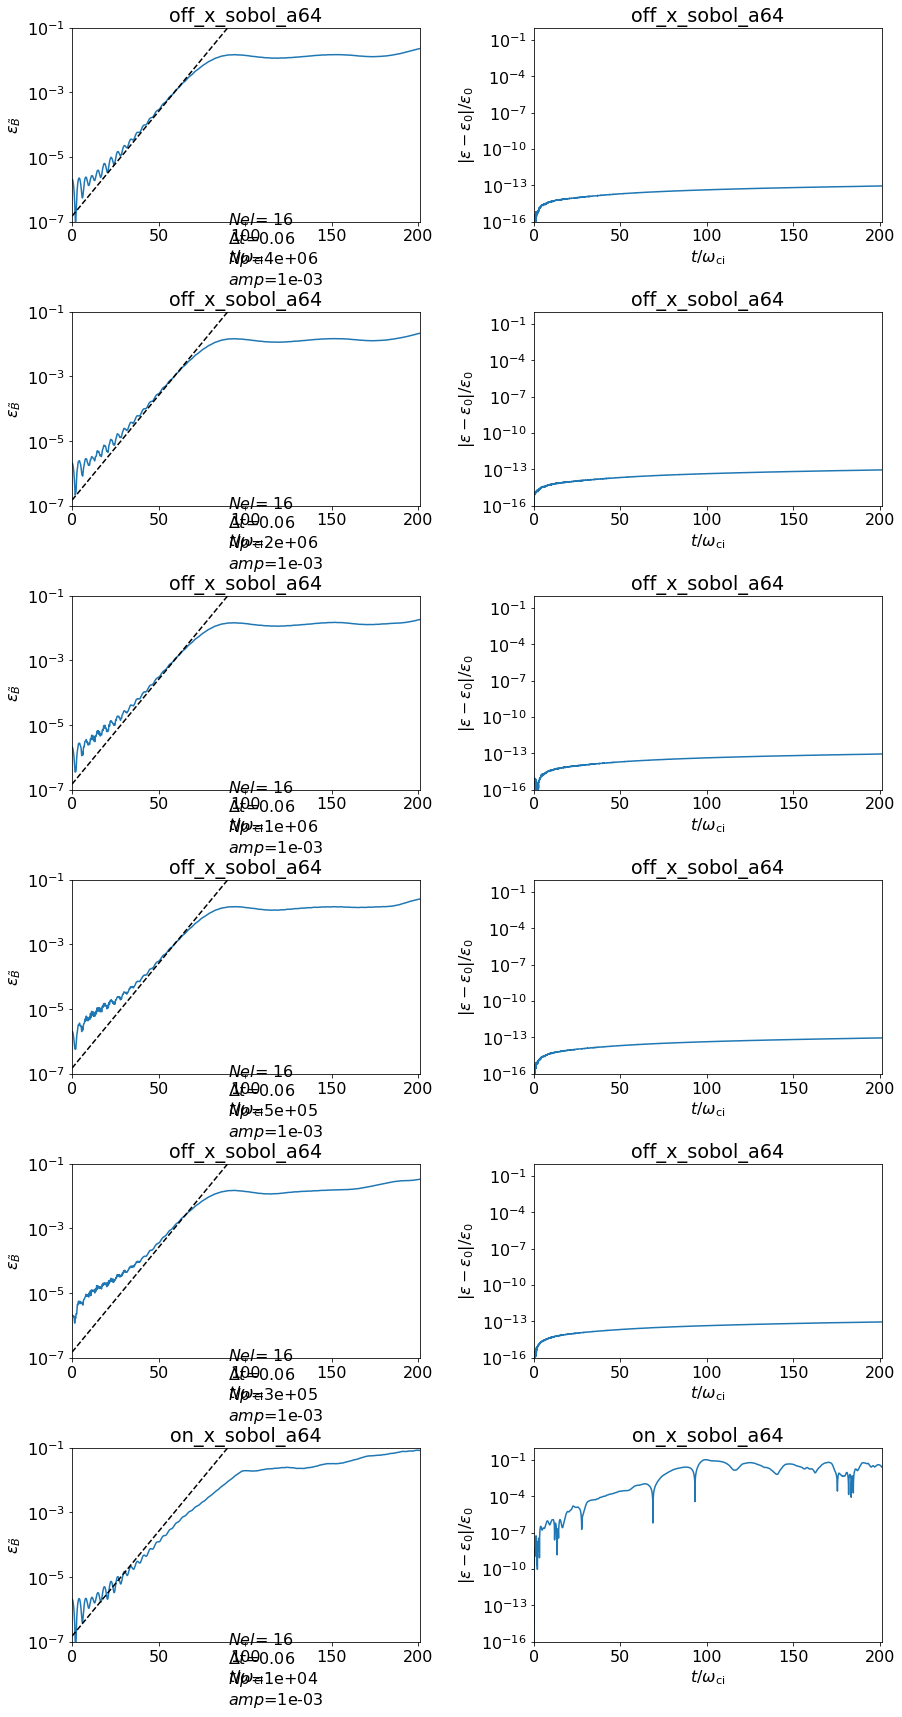

In [17]:
strings = [#str_01
           #, str_02
           #, str_03
           #, str_04
           #, str_05
           #, str_06
           #, str_07
           #, str_08
           #, str_09
           #, str_10
           #, str_11
           #, str_12
           #, str_13
            str_14
           , str_15
           , str_16
           , str_17
           , str_18
           #, str_18b
           #, str_19
           , str_20
           #, str_21
           #, str_22
           #, str_23
           #, str_24
           #, str_25
]

# set some figure parameters
plt.rcParams['figure.figsize'] = 13, 4*len(strings)
plt.rcParams['font.size'] = 16
fig = plt.figure()

# coordinates where text is put in plots:
text_pos_x = 90.
text_pos_y = 1e-9

for i in range(len(strings)):
    
    st = strings[i]
    print(st)
    
    ind_01 = st.find('_Nel') 
    ind_02 = st.find('_p')
    ind_03 = st.find('_L')
    ind_04 = st.find('_dt')
    ind_05 = st.find('_Np')
    ind_06 = st.find('_vth')
    ind_07 = st.find('_v0')
    ind_08 = st.find('_nuh')
    ind_09 = st.find('_k')
    ind_10 = st.find('_amp')
    ind_11 = st.find('_CV')
    ind_12 = st.find('.txt')
    
    Nel = int(st[ind_01 + 5:ind_02])
    #print(Nel)
    p = int(st[ind_02 + 3:ind_03])
    #print(p)
    dt = float(st[ind_04 + 4:ind_05])
    #print(dt)
    Np = float(st[ind_05 + 4:ind_06])
    #print(Np)
    vth = float(st[ind_06 + 5:ind_07])
    #print(vth)
    v0 = float(st[ind_07 + 4:ind_08])
    #print(v0)
    nuh = float(st[ind_08 + 5:ind_09])
    #print(nuh)
    k = float(st[ind_09 + 3:ind_10])
    #print(k)
    amp = float(st[ind_10 + 5:ind_11])
    #print(amp)
    CV = st[ind_11 + 4:ind_12]
    #print(CV)
    L = float(st[ind_03 + 3])*np.pi/k
    #print(L)
    
    data = np.loadtxt(st)
    
    
    en_U   = data[:, 0]
    en_B   = data[:, 1]
    en_H   = data[:, -2]
    tn     = data[:, -1]
    en_tot = en_U + en_B + en_H + Eh_eq
    
    plt.subplot(len(strings), 2, 2*i+1)
    plt.semilogy(tn, en_B)
    plt.ylim((1e-7, 1e-1))
    plt.xlim((tn[0], tn[-1]))
    plt.semilogy(tn, 1.5e-7*np.exp(2*tn*wi), 'k--')
    plt.xlabel('$t/\omega_\mathrm{ci}$')
    plt.ylabel(r'$\epsilon_\tilde{B}$')
    plt.title(CV)
    plt.text(text_pos_x,text_pos_y,'$Nel$={0:3n}\n$\Delta t$={1:4.2f}\n$Np$={2:1.0e}\n$amp$={3:1.0e}'.format(Nel,dt,Np,amp))

    plt.subplot(len(strings), 2, 2*i+2)
    plt.semilogy(tn, np.abs(en_tot[0] - en_tot)/en_tot[0])
    plt.ylim((1e-16, 1e0))
    plt.xlim((tn[0], tn[-1]))
    plt.xlabel('$t/\omega_\mathrm{ci}$')
    plt.ylabel(r'$|\epsilon-\epsilon_0|/\epsilon_0}$')
    plt.title(CV)
    
# add space between subplots
fig.tight_layout(pad=1.5)

#plt.savefig('particle_scan_full-f.pdf', bbox_inches='tight')